# Data Analysis with Pandas: World Video Game Sales Data(cross-platform)
Mason Fryberger 01/19/2021

### Data Source and Analysis tools:
Data pulled from [Kaggle-Video-Game-Sales](https://www.kaggle.com/gregorut/videogamesales)

Data structured and analyzed with Pandas and NumPy
Dollar values in millions.

This Study attempts to answer the following questions:
- Which company is the most common video game publisher? (globally)
- What's the most common platform? (globally)
- What's the most common genre of game? (globally)
- What are the top 20 highest grossing games? (globally)
- For North Amercan (NA) game sales, what is the median?
    - what are the top ten games at or around the median?
- For the top selling game of all time (globally), what is the standard deviation of NA sales
  to the Global average
- The Nintendo Wii seems to have the most games published, how does its average sales compare
  to the sales of other platforms? 
  - overall?
  - individually?
  
- What Percent of the global marketshare is held by NA?
- What is the rate of growth for the game publishing industry globally?
- Assuming a constant rate of growth and constant marketshare, what are the expected sales
  for NA next year
  



Imports, Aliases, and Assignments


In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv('data-sets-csv/vgsales.csv')
pd.set_option('precision', 4)


In [2]:

df.set_index('Name')

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Name,,,,,,,,,,
Wii Sports,1,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
Super Mario Bros.,2,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
Mario Kart Wii,3,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
Wii Sports Resort,4,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
Pokemon Red/Pokemon Blue,5,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
Woody Woodpecker in Crazy Castle 5,16596,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
Men in Black II: Alien Escape,16597,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
SCORE International Baja 1000: The Official Game,16598,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### Most common Game publisher

In [3]:
common_pub = df['Publisher'].mode()
common_pub


0    Electronic Arts
dtype: object

In [4]:
games_by_pub = df[df['Publisher'] == 'Electronic Arts'][['Name']].count()
games_by_pub

Name    1351
dtype: int64

We can see that Electronic Arts was the most common publisher over the time covered by the dataset with over 1,300 games published.

### Most Common Platform

We based our calclulation for the most common platform purely on the total number of titles published for the system in the years covered by the study. It is possible that a more accurate representation might be achieved using a coefficient of global sales in relation to other platforms however with out access to data regarding the Number of copies sold, this approach was disregarded and we have restricted our query to the data-set and number of occurences within it. 

In [5]:
common_plat = df['Platform'].mode()
common_plat

0    DS
dtype: object

In [6]:
games_on_ds = df[df['Platform'] == 'DS'][['Name']].count()
games_on_ds

Name    2163
dtype: int64

### Most Common Genre: (occurences in Dataset)

as with Most Common Platform we restrict ourselves to measureing occurences in the dataset, as calculations without access  to cost/unit and units-sold could not be considered accurate regarding presence/demand in the marketplace.


In [7]:
common_genre = df['Genre'].mode()
print(common_genre)
titles_in_genre = df[df['Genre'] == 'Action'][['Name']].count()
titles_in_genre


0    Action
dtype: object


Name    3316
dtype: int64

In conclusion the "Action" genre is the most common in the dataset with 3,316 occurences.


### Top 20 Highest Grossing games (globally)


                                              Global_Sales
Name                                                      
Wii Sports                                           82.74
Super Mario Bros.                                    40.24
Mario Kart Wii                                       35.82
Wii Sports Resort                                    33.00
Pokemon Red/Pokemon Blue                             31.37
Tetris                                               30.26
New Super Mario Bros.                                30.01
Wii Play                                             29.02
New Super Mario Bros. Wii                            28.62
Duck Hunt                                            28.31
Nintendogs                                           24.76
Mario Kart DS                                        23.42
Pokemon Gold/Pokemon Silver                          23.10
Wii Fit                                              22.72
Wii Fit Plus                                         22.

<AxesSubplot:xlabel='Name'>

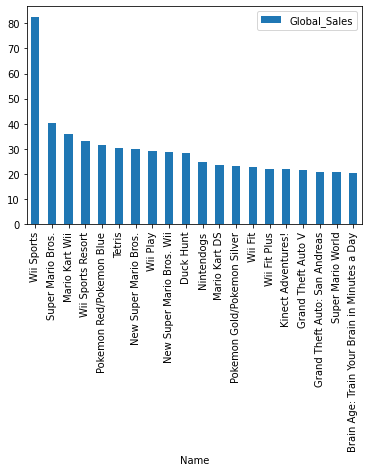

In [8]:
sorted_games_by_sales = df[['Name', 'Global_Sales']].set_index('Name').head(20)
print(sorted_games_by_sales)
sorted_games_by_sales.plot(kind="bar")


### Median NA Sales and top ten games at or near Median value.

For games in the top ten list with sales not equal to the median we sorted by equal number of titles above and below the median. 
on discovering that more than ten titles were at the median value we decided to plot the first ten returned by our query. values shown in millions.

In [9]:
median_na_sales = df['NA_Sales'].median()
print(f'{median_na_sales} million')

ten_group_med = df[df['NA_Sales'] == median_na_sales][['Name', 'NA_Sales']].set_index('Name').head(10)
    
print(f'{ten_group_med}')

0.08 million
                                                    NA_Sales
Name                                                        
Dragon Warrior IV                                       0.08
World Soccer Winning Eleven 7 International             0.08
Farming Simulator 2015                                  0.08
Pro Evolution Soccer 2008                               0.08
Winning Eleven: Pro Evolution Soccer 2007 (All ...      0.08
Phantasy Star Portable 2                                0.08
The Sims 2: Castaway                                    0.08
SingStar Queen                                          0.08
Top Spin 3                                              0.08
Sonic & All-Stars Racing Transformed                    0.08


### Standard Deviation for Top Grossing game to Global Average

to determine how far above or below the Global average the top grossing game was we first Identified the game and global average and then used pandas built in std() method to get the standard deviation. by multiplying the difference between global_mean and NA_Sales by the standard deviation we get the number of deviations above or below as a (+/-)integer

In [10]:
global_mean = df['Global_Sales'].mean()
print(f'{global_mean} Global Average in millions')

top_gross = df[df['Global_Sales'] == df['Global_Sales'].max()][['Name']].set_index('Name')
top_gross_val = df['Global_Sales'].max()
print(f'Top Grossing Game of all time: {top_gross.index[0]} with {top_gross_val} million in Global Sales')

standard_devi = df['Global_Sales'].std()
print(f'Standard Deviation: {standard_devi}')
top_gross_na_sales = df[df['Global_Sales'] == df['Global_Sales'].max()][['Name', 'NA_Sales']][['NA_Sales']].set_index('NA_Sales')
print(f'North American sales for Top Grossing game of all time: {top_gross_na_sales.index[0]}')

print(f'At {top_gross_na_sales.index[0]} {top_gross.index[0]} NA Sales are {(global_mean - top_gross_na_sales.index[0]) // standard_devi} standard deviations below the global average of {global_mean}')

0.5374406555006628 Global Average in millions
Top Grossing Game of all time: Wii Sports with 82.74 million in Global Sales
Standard Deviation: 1.5550279355699124
North American sales for Top Grossing game of all time: 41.49
At 41.49 Wii Sports NA Sales are -27.0 standard deviations below the global average of 0.5374406555006628


### Nintendo Wii: average sales compared to other platforms.
while the assigned feature task claims that the Wii has most games published we know from our earlier analysis that it is actually the DS with most games published. 

here we have chosen to plot the global sales of all platforms in a barchart and then show the global sales for Nintendo Wii as a percentage of all global sales in a piechart.

Global Sales by Platform in millions: 
 Platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.87
DC        15.97
GEN       28.36
SAT       33.59
PSV       61.93
WiiU      81.86
2600      97.08
XOne     141.06
GC       199.36
SNES     200.05
N64      218.88
3DS      247.46
NES      251.07
GB       255.45
XB       258.26
PC       258.82
PS4      278.10
PSP      296.28
GBA      318.50
PS       730.66
DS       822.49
Wii      926.71
PS3      957.84
X360     979.96
PS2     1255.64
Name: Global_Sales, dtype: float64


<AxesSubplot:>

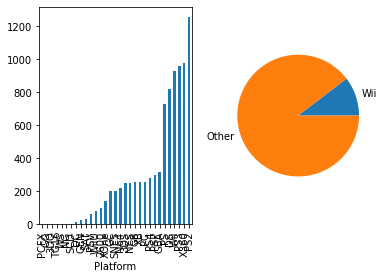

In [11]:
platforms = df.groupby('Platform')['Global_Sales'].sum().sort_values()
wii_sale = platforms[platforms == platforms['Wii']]
glb_sale = platforms[platforms != platforms['Wii']]

other_sales = pd.Series([glb_sale.sum()], index=["Other"])
wii_sale = wii_sale.append(other_sales)

fig, axs = plt.subplots(1,2)

print(f'Global Sales by Platform in millions: \n {platforms}')

platforms.plot(kind='bar', ax=axs[0]) 
wii_sale.plot(kind='pie', label="", ax=axs[1]) 


### What percent of Global marketshare is held by NA:
 
We can see this with a simple calculation by pulling the sum of NA sales and dividing it by the sum of global sales. 


In [12]:
total_mkt = df['Global_Sales'].sum().round(3)
na_mkt = df['NA_Sales'].sum().round(3)
mkt_capture_na = na_mkt / total_mkt
print(f' North America holds {mkt_capture_na.round(2) * 100} % of the Global Market')

 North America holds 49.0 % of the Global Market


### Rate of Growth for Global Game Sales.
While a more accurate calculation would factor the average growth from year to year,for the purposes here we will calculate only the overall rate of growth for the total years of the study.



In [13]:
by_year = df.groupby('Year')[['Global_Sales']].sum()
num_years = by_year['Global_Sales'].count()
first_sales = by_year['Global_Sales'][by_year.index[0]].round()
# print(f'first year of study Global_Sales in millions: {first_sales} ')
last_sales = by_year['Global_Sales'][by_year.index[-1]]
# print(f'last year of study Global_Sales in millions: {last_sales}')

growth = ((last_sales - first_sales ) / first_sales) * 100
print(f'Historical Growth of Global_Sales over {num_years} covered by the study:  {growth.round(3)} %')
# print(f'Global_Sales for {num_years} years covered by the study: in millions \n {by_year}')


Historical Growth of Global_Sales over 39 covered by the study:  -97.364 %


### Assuming Rate of Growth remains constant; What are the projected NA Sales for the Next year?

we calculate this based on the percent of global marketshare attributed to NA_Sales.

In [41]:
global_annual_data = df.groupby('Year')[['Global_Sales']].sum()
global_present = global_annual_data['Global_Sales'][global_annual_data.index[-1]]
glb_per_anm_chng = -.97 / global_annual_data['Global_Sales'].count()
glb_nxt = global_present + (global_present * glb_per_anm_chng)
na_next = glb_nxt * .49
print(f'Next Year Projected North Amercan sales: {na_next.round(3)} million')



Next Year Projected North Amercan sales: 0.139 million
